# Time Series Anaysis 

## Cleaning the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px

sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Plot the data
def plot_data(df, title='Remaining temperature after modelling Trend and Seasonality'):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('Termperature in °C')
    plt.show()

In [9]:
#Import Data
df_temp = pd.read_csv("/home/fabian/spiced_projects/student_code/week07/data/ECA_blended_custom_Trier_petrisberg/TG_STAID002760.txt", sep="," ,header=14)
df_temp.head(2) 

,SOUID,DATE,TG,Q_TG
0,111477,19370101,-9999,9
1,111477,19370102,-9999,9


In [5]:
#Short Analysis
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31197 entries, 0 to 31196
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    31197 non-null  int64
 1       DATE  31197 non-null  int64
 2      TG     31197 non-null  int64
 3    Q_TG     31197 non-null  int64
dtypes: int64(4)
memory usage: 975.0 KB


In [10]:
#Remove spaces from the column name
df_temp.columns = [columnname.strip() for columnname in df_temp.columns]

In [19]:
# check for na
df_temp.isna().sum()

SOUID    0
DATE     0
TG       0
Q_TG     0
dtype: int64

In [20]:
# change the date columen to datetime data type
df_temp['DATE'] = pd.to_datetime(df_temp['DATE'].astype(str))

In [21]:
# assign date column as index
df_temp.index = df_temp['DATE']

In [22]:
# temperature data need to be adjusted by one decimal
df_temp['TG'] = df_temp['TG'] /10

In [23]:
df_temp

,SOUID,DATE,TG,Q_TG
DATE,,,,
1937-01-01,111477,1937-01-01,-999.9,9
1937-01-02,111477,1937-01-02,-999.9,9
1937-01-03,111477,1937-01-03,-999.9,9
1937-01-04,111477,1937-01-04,-999.9,9
1937-01-05,111477,1937-01-05,-999.9,9
...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0
2022-05-28,111477,2022-05-28,12.0,0
2022-05-29,111477,2022-05-29,10.2,0


In [24]:
# replace "-999.9" values by nan
df_temp['TG'] = df_temp['TG'].replace(-999.9, np.nan)

In [25]:
df_temp

,SOUID,DATE,TG,Q_TG
DATE,,,,
1937-01-01,111477,1937-01-01,NaN,9
1937-01-02,111477,1937-01-02,NaN,9
1937-01-03,111477,1937-01-03,NaN,9
1937-01-04,111477,1937-01-04,NaN,9
1937-01-05,111477,1937-01-05,NaN,9
...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0
2022-05-28,111477,2022-05-28,12.0,0
2022-05-29,111477,2022-05-29,10.2,0


In [26]:
#First Years until End of Dec 1947 are nan vaues. --> Drop It
df_temp = df_temp.loc['1948-01-01':'2022-05-31']
df_temp

,SOUID,DATE,TG,Q_TG
DATE,,,,
1948-01-01,111477,1948-01-01,3.0,0
1948-01-02,111477,1948-01-02,10.2,0
1948-01-03,111477,1948-01-03,10.6,0
1948-01-04,111477,1948-01-04,9.0,0
1948-01-05,111477,1948-01-05,7.4,0
...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0
2022-05-28,111477,2022-05-28,12.0,0
2022-05-29,111477,2022-05-29,10.2,0


In [27]:
#Count remaining NaN VAues
np.count_nonzero(np.isnan(df_temp['TG']))

5

In [28]:
# Show rows which contain nan
df_temp[df_temp.isna().any(axis=1)]

,SOUID,DATE,TG,Q_TG
DATE,,,,
2017-07-12,910609,2017-07-12,NaN,9
2017-07-13,910609,2017-07-13,NaN,9
2017-07-14,910609,2017-07-14,NaN,9
2017-07-15,910609,2017-07-15,NaN,9
2017-07-16,910609,2017-07-16,NaN,9


In [29]:
# Replace NaN vales in July with average temperature of july
# Calculate average temperature of July
temp_av_ju17 = df_temp.loc['20170701':'20170731']['TG'].dropna().mean()
temp_av_ju17 

20.107692307692307

In [30]:
# replace NaN values with average temperature
df_temp['TG'] = df_temp['TG'].replace(np.nan, temp_av_ju17)

/tmp/ipykernel_13358/339456963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['TG'] = df_temp['TG'].replace(np.nan, temp_av_ju17)


In [31]:
df_temp['TG'].isnull().sum()

0

## Visual EDA

(16436.0, 18993.0)

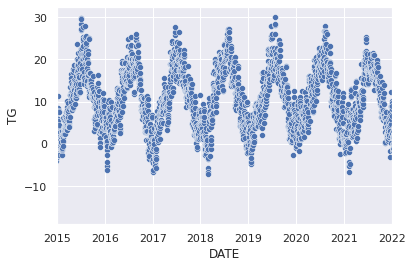

In [32]:
# Show temperature for ceratin timeperiod
sns.scatterplot(data=df_temp, x='DATE', y='TG')
plt.xlim([pd.to_datetime('2015-01-01'), pd.to_datetime('2022-01-01')])

/tmp/ipykernel_13358/3671811766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mv_avg'] = df_temp['TG'].rolling(window=5000).mean()


(7.5, 11.0)

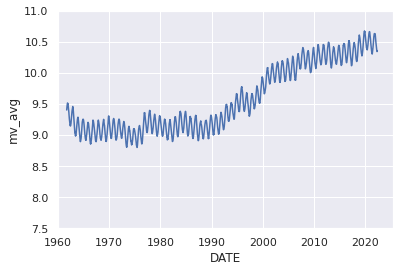

In [33]:
# Create a moving average and show the trend of temperature
df_temp['mv_avg'] = df_temp['TG'].rolling(window=5000).mean()
sns.lineplot(data=df_temp, x='DATE', y='mv_avg')
plt.xlim(left=pd.to_datetime('1960-01-01'))
plt.ylim([7.5,11.0])

# Analysis fo the Trend & Seasonality & Noise

## Automatically

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
sd = seasonal_decompose(df_temp['TG'], model='additive', period = 10*365)

# optional parameter: model="multiplicative" # this assumes trend * seasonality instead of trend + seasonality

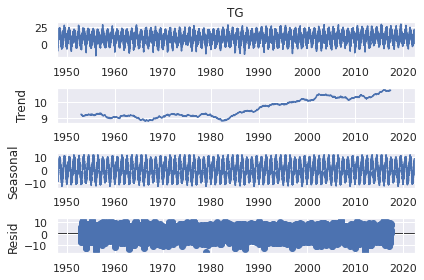

In [38]:
sd.plot()

None

## Manually

### 1. Model the Trend


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# create a timestep columen starting/counting from 0 to the last
df_temp['timestep'] = range(len(df_temp))
df_temp

/tmp/ipykernel_13358/853344930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['timestep'] = range(len(df_temp))


,SOUID,DATE,TG,Q_TG,mv_avg,timestep
DATE,,,,,,
1948-01-01,111477,1948-01-01,3.0,0,NaN,0
1948-01-02,111477,1948-01-02,10.2,0,NaN,1
1948-01-03,111477,1948-01-03,10.6,0,NaN,2
1948-01-04,111477,1948-01-04,9.0,0,NaN,3
1948-01-05,111477,1948-01-05,7.4,0,NaN,4
...,...,...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0,10.356828,27175
2022-05-28,111477,2022-05-28,12.0,0,10.357468,27176
2022-05-29,111477,2022-05-29,10.2,0,10.357368,27177


In [41]:
# Assign X and y for fitting
X = df_temp[['timestep']]
y = df_temp['TG']

In [42]:
# assign lineagRegression
m = LinearRegression()

In [45]:
# fit X,y
m.fit(X,y)

LinearRegression()

In [46]:
# create a column to predict the trend
df_temp['trend'] = m.predict(X)

/tmp/ipykernel_13358/1800162176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['trend'] = m.predict(X)


In [47]:
df_temp

,SOUID,DATE,TG,Q_TG,mv_avg,timestep,trend
DATE,,,,,,,
1948-01-01,111477,1948-01-01,3.0,0,NaN,0,8.752873
1948-01-02,111477,1948-01-02,10.2,0,NaN,1,8.752939
1948-01-03,111477,1948-01-03,10.6,0,NaN,2,8.753005
1948-01-04,111477,1948-01-04,9.0,0,NaN,3,8.753071
1948-01-05,111477,1948-01-05,7.4,0,NaN,4,8.753137
...,...,...,...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0,10.356828,27175,10.544121
2022-05-28,111477,2022-05-28,12.0,0,10.357468,27176,10.544187
2022-05-29,111477,2022-05-29,10.2,0,10.357368,27177,10.544253


<AxesSubplot:xlabel='DATE'>

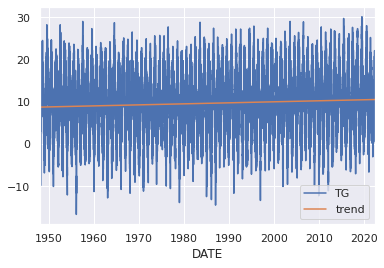

In [48]:
#plot the trend vs temperature
df_temp[['TG', 'trend']].plot()

In [49]:
#
m.intercept_,m.coef_

(8.752873081596794, array([6.59153023e-05]))

/tmp/ipykernel_13358/384068387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['wo_trend'] = df_temp['TG'] - df_temp['trend']


<AxesSubplot:xlabel='DATE'>

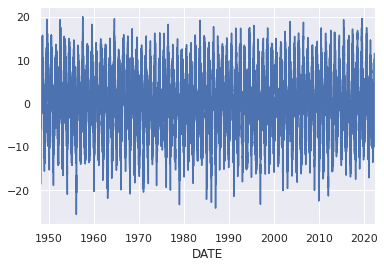

In [50]:
# reduce the temperature by the trend and plot it
df_temp['wo_trend'] = df_temp['TG'] - df_temp['trend']
df_temp['wo_trend'].plot()



### 2. Model the seasonality


/tmp/ipykernel_13358/1903260211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['seasonality'] = df_temp.groupby(df_temp.index.month)['wo_trend'].transform('mean')


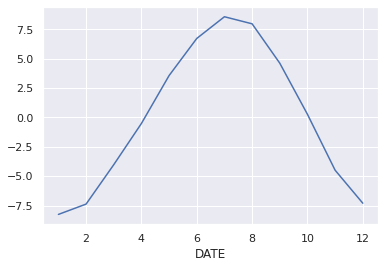

In [51]:
# We know that the season length (period) is one year.
# We obtain the average seasonality by averaging each day of the year over all years

df_temp.groupby([df_temp.index.month])['wo_trend'].mean().plot()

# extend this average to all years
df_temp['seasonality'] = df_temp.groupby(df_temp.index.month)['wo_trend'].transform('mean')



In [60]:
# The trend + seasonality can also be modelled as a linear regression having the timesteps
# and encoded months

df_temp['month'] = df_temp.index.month
df_temp

/tmp/ipykernel_13358/3895444083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['month'] = df_temp.index.month


,SOUID,DATE,TG,Q_TG,mv_avg,timestep,trend,wo_trend,seasonality,month,pred_try
DATE,,,,,,,,,,,
1948-01-01,111477,1948-01-01,3.0,0,NaN,0,8.752873,-5.752873,-8.258962,1,6.724800
1948-01-02,111477,1948-01-02,10.2,0,NaN,1,8.752939,1.447061,-8.258962,1,6.724866
1948-01-03,111477,1948-01-03,10.6,0,NaN,2,8.753005,1.846995,-8.258962,1,6.724931
1948-01-04,111477,1948-01-04,9.0,0,NaN,3,8.753071,0.246929,-8.258962,1,6.724996
1948-01-05,111477,1948-01-05,7.4,0,NaN,4,8.753137,-1.353137,-8.258962,1,6.725062
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0,10.356828,27175,10.544121,4.655879,3.567606,5,9.979951
2022-05-28,111477,2022-05-28,12.0,0,10.357468,27176,10.544187,1.455813,3.567606,5,9.980016
2022-05-29,111477,2022-05-29,10.2,0,10.357368,27177,10.544253,-0.344253,3.567606,5,9.980081


In [61]:
# one hot encode months
month_dummies = pd.get_dummies(df_temp.index.month,drop_first=True,prefix='month').set_index(df_temp.index)
month_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,
1948-01-01,0,0,0,0,0,0,0,0,0,0,0
1948-01-02,0,0,0,0,0,0,0,0,0,0,0
1948-01-03,0,0,0,0,0,0,0,0,0,0,0
1948-01-04,0,0,0,0,0,0,0,0,0,0,0
1948-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0,0,0,1,0,0,0,0,0,0,0
2022-05-28,0,0,0,1,0,0,0,0,0,0,0
2022-05-29,0,0,0,1,0,0,0,0,0,0,0


In [68]:
# add the one encoded month and remove month column
X = X.join(month_dummies)
X = X.drop('month',axis=1)
X

ValueError: columns overlap but no suffix specified: Index(['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [71]:
# predict  trend & seasonality
m.fit(X,y)
df_temp['trend_and_seasonality'] = m.predict(X)
df_temp

/tmp/ipykernel_13358/4148495764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['trend_and_seasonality'] = m.predict(X)


,SOUID,DATE,TG,Q_TG,mv_avg,timestep,trend,wo_trend,seasonality,month,pred_try,trend_and_seasonality
DATE,,,,,,,,,,,,
1948-01-01,111477,1948-01-01,3.0,0,NaN,0,8.752873,-5.752873,-8.258962,1,6.724800,0.468770
1948-01-02,111477,1948-01-02,10.2,0,NaN,1,8.752939,1.447061,-8.258962,1,6.724866,0.468838
1948-01-03,111477,1948-01-03,10.6,0,NaN,2,8.753005,1.846995,-8.258962,1,6.724931,0.468906
1948-01-04,111477,1948-01-04,9.0,0,NaN,3,8.753071,0.246929,-8.258962,1,6.724996,0.468973
1948-01-05,111477,1948-01-05,7.4,0,NaN,4,8.753137,-1.353137,-8.258962,1,6.725062,0.469041
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0,10.356828,27175,10.544121,4.655879,3.567606,5,9.979951,14.136860
2022-05-28,111477,2022-05-28,12.0,0,10.357468,27176,10.544187,1.455813,3.567606,5,9.980016,14.136928
2022-05-29,111477,2022-05-29,10.2,0,10.357368,27177,10.544253,-0.344253,3.567606,5,9.980081,14.136996


<AxesSubplot:xlabel='DATE'>

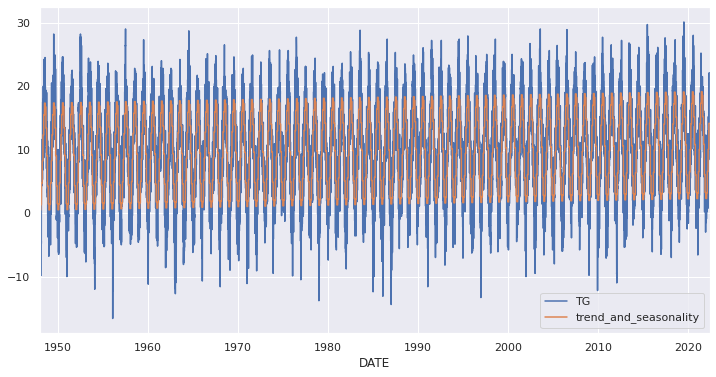

In [43]:
# plot original temperature vs predicte "trend & seasonality"
df_temp[['TG','trend_and_seasonality']].plot()

### 3. Extracting the Remainder


/tmp/ipykernel_13358/3627511308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['remainder'] = df_temp['TG'] - df_temp['trend_and_seasonality']


<AxesSubplot:xlabel='DATE'>

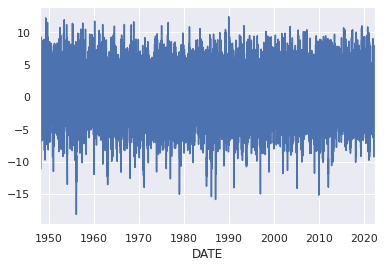

In [73]:
# substract the predicted "trend & seasonality" from original temperature
df_temp['remainder'] = df_temp['TG'] - df_temp['trend_and_seasonality']
df_temp['remainder'].plot()



---

In [ ]:
# calculate mean and standard deviation
df_temp['remainder'].mean(),df_temp['remainder'].std()

(7.389722878255567e-16, 3.7506223537790806)

## Autogressive Modelling of Remainder

### Create lag

In [74]:
# create 1 timestep leg
df_temp['lag1'] = df_temp['remainder'].shift(1)

/tmp/ipykernel_13358/1304358198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['lag1'] = df_temp['remainder'].shift(1)


In [ ]:
df_temp.head(3)

,SOUID,DATE,TG,Q_TG,mv_avg,timestep,trend,wo_trend,seasonality,month,pred_try,trend_and_seasonality,remainder,lag1
DATE,,,,,,,,,,,,,,
1948-01-01,111477,1948-01-01,3.0,0,NaN,0,8.752873,-5.752873,-8.258962,1,6.724800,0.468770,2.531230,NaN
1948-01-02,111477,1948-01-02,10.2,0,NaN,1,8.752939,1.447061,-8.258962,1,6.724866,0.468838,9.731162,2.531230
1948-01-03,111477,1948-01-03,10.6,0,NaN,2,8.753005,1.846995,-8.258962,1,6.724931,0.468906,10.131094,9.731162


### Check for Autocorrelation

In [75]:
# check autocorrelation of remainder
df_temp[['remainder']].corrwith(df_temp['lag1'])

remainder    0.803106
dtype: float64

In [76]:
#correlation matrix
df_temp_corr = df_temp[['remainder']].join(df_temp['lag1'])
correlation = round(df_temp_corr.corr(), 2)
correlation

,remainder,lag1
remainder,1.0,0.8
lag1,0.8,1.0


<AxesSubplot:>

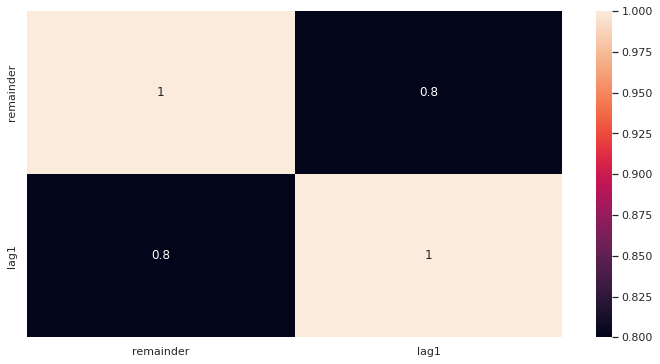

In [ ]:
sns.heatmap(correlation, annot=True)

### Autoregressive Model

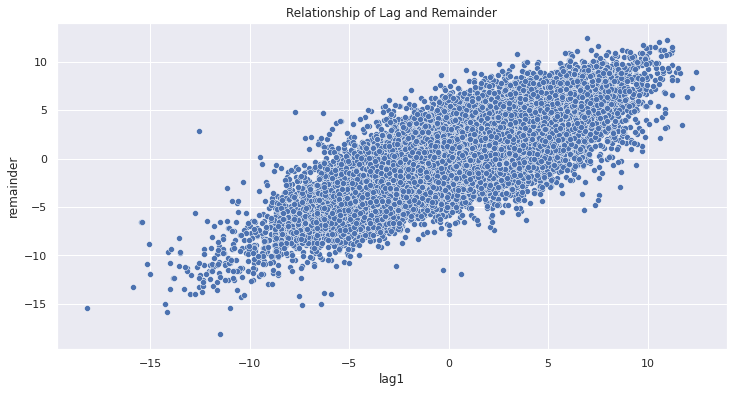

In [ ]:
# Create a scatterplot
sns.scatterplot(x='lag1', y='remainder', data=df_temp)
plt.title('Relationship of Lag and Remainder')
plt.show()

## 5) Run an Autoregressive Model (Linear Regression) of lag1 on the remainder

In [ ]:
# Drop missing values
df_temp.dropna(inplace=True)
df_temp.head()

/home/fabian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,SOUID,DATE,TG,Q_TG,mv_avg,timestep,trend,wo_trend,seasonality,month,pred_try,trend_and_seasonality,remainder,lag1
DATE,,,,,,,,,,,,,,
1961-09-08,111477,1961-09-08,11.4,0,9.40408,4999,9.082384,2.317616,4.622165,9,10.011109,13.688585,-2.288585,-2.088517
1961-09-09,111477,1961-09-09,12.1,0,9.40590,5000,9.082450,3.017550,4.622165,9,10.011175,13.688653,-1.588653,-2.288585
1961-09-10,111477,1961-09-10,13.9,0,9.40664,5001,9.082516,4.817484,4.622165,9,10.011240,13.688721,0.211279,-1.588653
1961-09-11,111477,1961-09-11,14.1,0,9.40734,5002,9.082581,5.017419,4.622165,9,10.011305,13.688788,0.411212,0.211279
1961-09-12,111477,1961-09-12,14.7,0,9.40848,5003,9.082647,5.617353,4.622165,9,10.011371,13.688856,1.011144,0.411212


In [ ]:
# Assign X and y
X = df_temp[['lag1']]
y = df_temp['remainder']

In [ ]:
# Create and fit the model
ar_model = LinearRegression()
ar_model.fit(X, y)

LinearRegression()

In [ ]:
# Create predictions
df_temp['ar_predictions'] = ar_model.predict(X)

/tmp/ipykernel_17140/559123037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['ar_predictions'] = ar_model.predict(X)


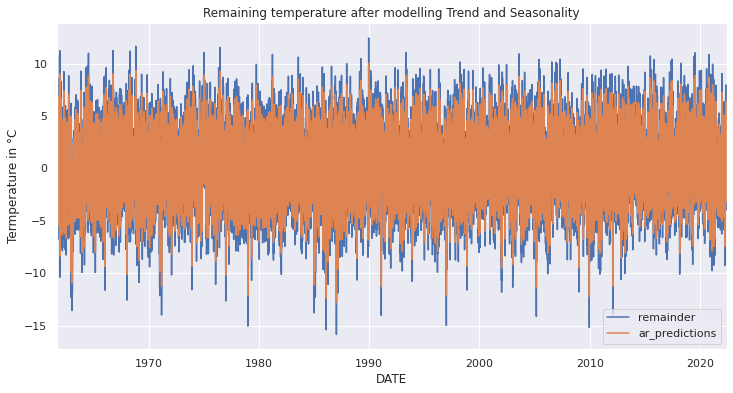

In [ ]:
# Plot the original remainder and the prediction
plot_data(df_temp[['remainder', 'ar_predictions']])

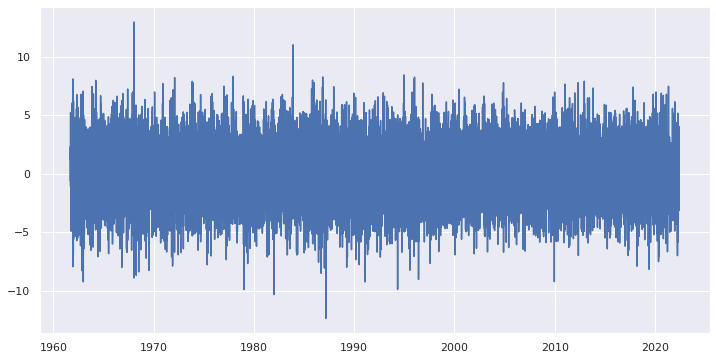

In [ ]:
# Inspect the residual after modelling the remainder
plt.plot(df_temp.remainder - df_temp.ar_predictions)

### Define the right amount of lags

/home/fabian/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Partial Autocorrelation')

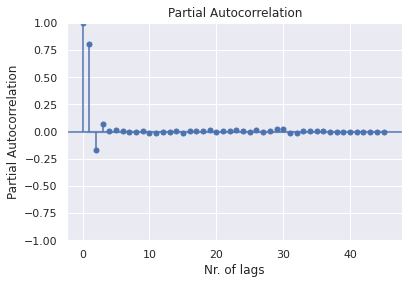

In [77]:
# plot partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_pacf(df_temp['remainder']);
plt.xlabel('Nr. of lags')
plt.ylabel('Partial Autocorrelation')

##  Introduce ar_select_order

In [78]:
# Let ar_select_order select the number of lags for the remainder
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

selected_order = ar_select_order(df_temp['remainder'], maxlag=12)



/home/fabian/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/fabian/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [79]:
# Inspect the number of lags chosen
selected_order.ar_lags 

[1, 2, 3]

**The analysis about how many lags to include into the model has to be done using the remainder**. This is because the remainder is stripped of the influence of trend and seasonality.

In [80]:
# Use AutoReg to model 
ar = AutoReg(df_temp.remainder, lags=3).fit()
ar.summary()

/home/fabian/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                27180
Model:                     AutoReg(3)   Log Likelihood              -59954.431
Method:               Conditional MLE   S.D. of innovations              2.197
Date:                Tue, 11 Oct 2022   AIC                         119918.863
Time:                        11:27:47   BIC                         119959.913
Sample:                    01-04-1948   HQIC                        119932.097
                         - 05-31-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0004      0.013     -0.030      0.976      -0.027       0.026
remainder.L1     0.9496      0.006    156.934      0.000       0.938       0.961
remainder.L2    -0.2343      0.008    -28.467      0.000      -0.250      -0.218
remainder.L3     0.0711      0.006     11.760      0.000       0.059       0.083
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3076           -0.0000j            1.3076           -0.0000
AR.2            0.9932           -3.1248j            3.2788           -0.2010
AR.3            0.9932           +3.1248j            3.2788            0.2010
-----------------------------------------------------------------------------
"""

In [81]:
df_temp

,SOUID,DATE,TG,Q_TG,mv_avg,timestep,trend,wo_trend,seasonality,month,pred_try,trend_and_seasonality,remainder,lag1
DATE,,,,,,,,,,,,,,
1948-01-01,111477,1948-01-01,3.0,0,NaN,0,8.752873,-5.752873,-8.258962,1,6.724800,0.468770,2.531230,NaN
1948-01-02,111477,1948-01-02,10.2,0,NaN,1,8.752939,1.447061,-8.258962,1,6.724866,0.468838,9.731162,2.531230
1948-01-03,111477,1948-01-03,10.6,0,NaN,2,8.753005,1.846995,-8.258962,1,6.724931,0.468906,10.131094,9.731162
1948-01-04,111477,1948-01-04,9.0,0,NaN,3,8.753071,0.246929,-8.258962,1,6.724996,0.468973,8.531027,10.131094
1948-01-05,111477,1948-01-05,7.4,0,NaN,4,8.753137,-1.353137,-8.258962,1,6.725062,0.469041,6.930959,8.531027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,111477,2022-05-27,15.2,0,10.356828,27175,10.544121,4.655879,3.567606,5,9.979951,14.136860,1.063140,2.263208
2022-05-28,111477,2022-05-28,12.0,0,10.357468,27176,10.544187,1.455813,3.567606,5,9.980016,14.136928,-2.136928,1.063140
2022-05-29,111477,2022-05-29,10.2,0,10.357368,27177,10.544253,-0.344253,3.567606,5,9.980081,14.136996,-3.936996,-2.136928


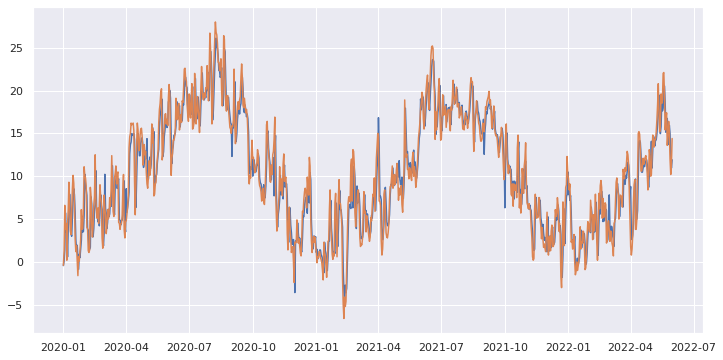

In [ ]:
plt.plot(df_temp.ar_predictions.loc['2020-01-01':'2022-05-31'] + df_temp.trend_and_seasonality.loc['2020-01-01':'2022-05-31'])
plt.plot(df_temp['TG'].loc['2020-01-01':'2022-05-31'])

In [83]:
# directly use AutoReg to model
statsmodels_ar = AutoReg(df_temp['TG'], lags=3, trend='ct', seasonal=True).fit()

/home/fabian/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


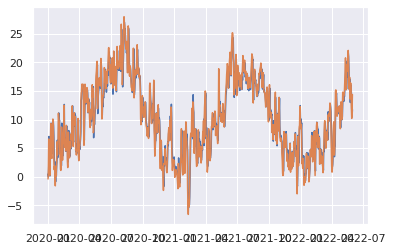

In [84]:
plt.plot(statsmodels_ar.predict().loc['2020-01-01':'2022-05-31'])
plt.plot(df_temp['TG'].loc['2020-01-01':'2022-05-31'])